# Task Three - Calvin Ng
## Section I - Trends for North Carolina

I chose to calculate trends for North Carolina over the past week. To do this, my methodology will be to retreive the data of deaths and cases from the past week for all counties in North Carolina, sum up each column, and then calculate the difference to determien the day-to-day difference. I will then plot this data in two separate line graphs to display the results and draw conclusions.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# read base set
base = pd.read_csv('../Data/base_set_joined.csv')

# fetch the rows of NC and the columns for cases and deaths of the past week
nc_last_week = base.loc[base['State'] == 'NC']

date_range = '2023-01-09|2023-01-1[0-6]'
cols = nc_last_week.columns
filtered_columns = [col for col in cols if re.search(date_range, col)]
nc_last_week = nc_last_week[filtered_columns]

nc_last_week

,cases 2023-01-09,cases 2023-01-10,cases 2023-01-11,cases 2023-01-12,cases 2023-01-13,cases 2023-01-14,cases 2023-01-15,cases 2023-01-16,deaths 2023-01-09,deaths 2023-01-10,deaths 2023-01-11,deaths 2023-01-12,deaths 2023-01-13,deaths 2023-01-14,deaths 2023-01-15,deaths 2023-01-16
1904,11,11,11,11,11,11,11,11,0,0,0,0,0,0,0,0
1905,59655,59655,59655,60106,60106,60106,60106,60106,548,548,548,554,554,554,554,554
1906,12441,12441,12441,12499,12499,12499,12499,12499,154,154,154,156,156,156,156,156
1907,3620,3620,3620,3640,3640,3640,3640,3640,19,19,19,19,19,19,19,19
1908,8162,8162,8162,8215,8215,8215,8215,8215,109,109,109,110,110,110,110,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,40237,40237,40237,40558,40558,40558,40558,40558,445,445,445,446,446,446,446,446
2001,22264,22264,22264,22432,22432,22432,22432,22432,299,299,299,302,302,302,302,302
2002,26815,26815,26815,26987,26987,26987,26987,26987,349,349,349,350,350,350,350,350
2003,14553,14553,14553,14657,14657,14657,14657,14657,141,141,141,143,143,143,143,143


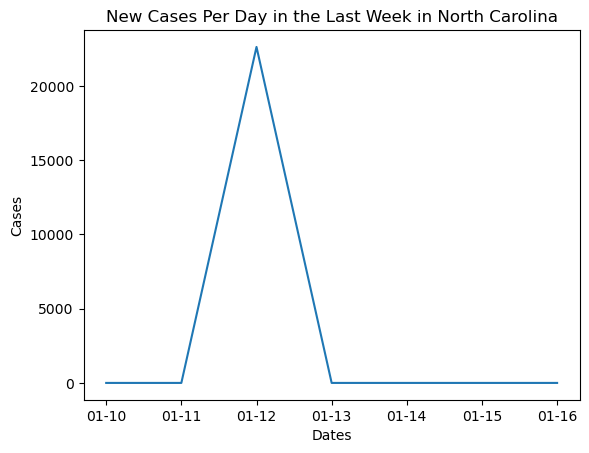

In [3]:
cases_x = []
cases_y = []

# calculate data for cases
for i in range(1, 8):
    # get difference between days
    prev_col = nc_last_week.iloc[:, i-1]
    curr_col = nc_last_week.iloc[:, i]
    diff = curr_col.sum() - prev_col.sum()
    
    # add data to lists
    cases_x.append(curr_col.name[-5:])
    cases_y.append(diff)
    
# plot data for cases
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('New Cases Per Day in the Last Week in North Carolina')
plt.plot(cases_x, cases_y)

### Cases Analysis
There appears to be a spike on the twelfth, but the data is unreliable. It's highly unlikely that there were no new cases on any of the days, so it's possible that the data for this week is incorrect, or perhaps whoever was entering the data entered all the new cases for an entire week on the twelfth. This might be possible if the standard is to track the number of new cases per week instead of per day.

In conclusion, it's impossible to derive any useful insights from this data alone.

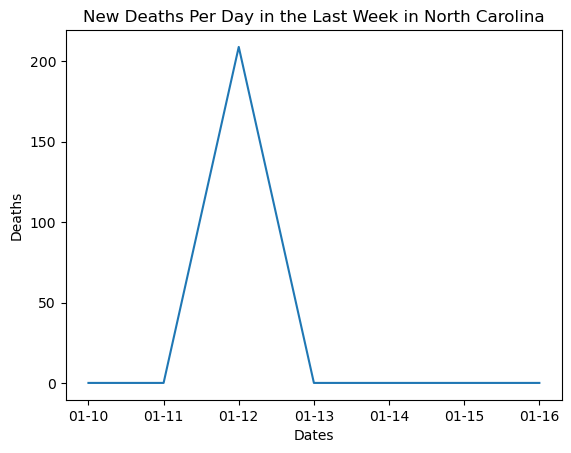

In [4]:
deaths_x = []
deaths_y = []

# calculate data for cases
for i in range(9, 16):
    # get difference between days
    prev_col = nc_last_week.iloc[:, i-1]
    curr_col = nc_last_week.iloc[:, i]
    diff = curr_col.sum() - prev_col.sum()
    
    # add data to lists
    deaths_x.append(curr_col.name[-5:])
    deaths_y.append(diff)
    
# plot data for cases
plt.xlabel('Dates')
plt.ylabel('Deaths')
plt.title('New Deaths Per Day in the Last Week in North Carolina')
plt.plot(deaths_x, deaths_y)

### Deaths Analysis

Once again, the data is unreliable. Like before, there is data for the twelfth and only the twelfth. What this implies is that this data is only getting updated on a weekly basis for whatever reasons, and the twelfth just happened to be the day of the week that it was updated.

Like before, it's impossible to conclude any useful insights regarding daily trends.

## Section II - Read and Display Enrichment Data

The enrichment datasets that I am working with are the employment datasets. In particular, I am working with the 2021 overall employment dataset.

In [13]:
employment_data = pd.read_excel('../Data/employment_2021.xlsx')
employment_data

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2021,A,Nation,NaN,U.S. TOTAL,Total Covered,"10 Total, all industries",NaN,10909076,143780068,9720962278782,1300,67610,1.00,1.00
1,US000,US,0.0,1,10,2021,A,Nation,NaN,U.S. TOTAL,Federal Government,"10 Total, all industries",NaN,61197,2883380,257212622303,1715,89205,1.00,1.00
2,US000,US,0.0,2,10,2021,A,Nation,NaN,U.S. TOTAL,State Government,"10 Total, all industries",NaN,70314,4539633,312484308527,1324,68835,1.00,1.00
3,US000,US,0.0,3,10,2021,A,Nation,NaN,U.S. TOTAL,Local Government,"10 Total, all industries",NaN,171152,13640403,803007368301,1132,58870,1.00,1.00
4,US000,US,0.0,5,10,2021,A,Nation,NaN,U.S. TOTAL,Private,"10 Total, all industries",NaN,10606413,122716652,8348257979651,1308,68029,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63004,C4974,NaN,NaN,5,1024,2021,A,MSA,NaN,"Yuma, AZ MSA",Private,1024 Professional and business services,NaN,496,6792,346982252,982,51084,0.68,0.55
63005,C4974,NaN,NaN,5,1025,2021,A,MSA,NaN,"Yuma, AZ MSA",Private,1025 Education and health services,NaN,430,8148,467726465,1104,57403,0.76,1.08
63006,C4974,NaN,NaN,5,1026,2021,A,MSA,NaN,"Yuma, AZ MSA",Private,1026 Leisure and hospitality,NaN,341,6452,151600827,452,23496,0.97,1.14
63007,C4974,NaN,NaN,5,1027,2021,A,MSA,NaN,"Yuma, AZ MSA",Private,1027 Other services,NaN,230,1282,50534385,758,39411,0.65,0.80


## Section III - Merging the Data

Before I merge the data, I want to talk about the general methodology. In our base data, we only have rows for individual counties, meaning the statewide and nationwide economical data cannot be merged on an inner join. While we could force the join with an outer join, there's no point since it will not match with any rows containing covid data, and therefore, we will be unable to relate that data to covid data.

So, I am only interested in countywide data, therefore, the first step will be to drop all rows that do not have the area type 'County.'

From there, the unique keys that I want to join on are the state name and the county name. Unfortunately, this information is not immediately available and needs to properly prepared. 

First, the state names in the base set are abbreviations while the ones in the employment dataset are full names, so the full names need to be mapped to their abbreviations.

Second, while the county name does exist, it's a substring of area and is followed up by ', State Name.' So, we need to drop the state name as that information is redundant thanks to the st name column.

Finally, we need to rename the columns so that they match the base set columns and can be joined.

Once all these steps have been accomplished, we can successfully merge the two dataframes and save the merged dataframe to a .csv file.

In [14]:
# # drop all non-county rows
employment_data = employment_data.loc[(employment_data['Area Type'] == 'County') 
                                      & (employment_data['Ownership'] == 'Total Covered')]

# mapping dictionary
state_mapping = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

# map state names to abbreviations
employment_data['St Name'] = employment_data['St Name'].map(state_mapping)

# extract county substring from Area column
employment_data['Area'] = employment_data['Area'].str.split(',').str[0]

# rename columns
employment_data = employment_data.rename(columns={'St Name': 'State', 'Area': 'County Name'})

# # merge and save
employment_data

C:\Users\calvi\AppData\Local\Temp\ipykernel_5968\394385978.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_data['St Name'] = employment_data['St Name'].map(state_mapping)
C:\Users\calvi\AppData\Local\Temp\ipykernel_5968\394385978.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_data['Area'] = employment_data['Area'].str.split(',').str[0]


,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,State,County Name,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
35,01001,01,1.0,0,10,2021,A,County,AL,Autauga County,Total Covered,"10 Total, all industries",NaN,964,11123,489569075,846,44015,1.0,1.0
52,01003,01,3.0,0,10,2021,A,County,AL,Baldwin County,Total Covered,"10 Total, all industries",NaN,7172,76546,3373892203,848,44077,1.0,1.0
69,01005,01,5.0,0,10,2021,A,County,AL,Barbour County,Total Covered,"10 Total, all industries",NaN,585,7719,310741163,774,40256,1.0,1.0
86,01007,01,7.0,0,10,2021,A,County,AL,Bibb County,Total Covered,"10 Total, all industries",NaN,385,4756,217856056,881,45809,1.0,1.0
103,01009,01,9.0,0,10,2021,A,County,AL,Blount County,Total Covered,"10 Total, all industries",NaN,853,8496,341493196,773,40195,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56184,56039,56,39.0,0,10,2021,A,County,WY,Teton County,Total Covered,"10 Total, all industries",NaN,2776,21134,1542785940,1404,73002,1.0,1.0
56202,56041,56,41.0,0,10,2021,A,County,WY,Uinta County,Total Covered,"10 Total, all industries",NaN,800,7877,343131982,838,43564,1.0,1.0
56220,56043,56,43.0,0,10,2021,A,County,WY,Washakie County,Total Covered,"10 Total, all industries",NaN,436,3550,163230661,884,45977,1.0,1.0
56238,56045,56,45.0,0,10,2021,A,County,WY,Weston County,Total Covered,"10 Total, all industries",NaN,277,2290,100142410,841,43726,1.0,1.0


In [15]:
# merge
merged = pd.merge(base, employment_data)

# save
merged.to_csv('../Data/employment_base_merged.csv', index=False)

merged

,countyFIPS,County Name,State,StateFIPS,cases 2020-01-22,cases 2020-01-23,cases 2020-01-24,cases 2020-01-25,cases 2020-01-26,cases 2020-01-27,...,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,964,11123,489569075,846,44015,1.0,1.0
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,7172,76546,3373892203,848,44077,1.0,1.0
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,585,7719,310741163,774,40256,1.0,1.0
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,385,4756,217856056,881,45809,1.0,1.0
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,853,8496,341493196,773,40195,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,1635,19796,1175291258,1142,59369,1.0,1.0
3067,56039,Teton County,WY,56,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,2776,21134,1542785940,1404,73002,1.0,1.0
3068,56041,Uinta County,WY,56,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,800,7877,343131982,838,43564,1.0,1.0
3069,56043,Washakie County,WY,56,0,0,0,0,0,0,...,Total Covered,"10 Total, all industries",NaN,436,3550,163230661,884,45977,1.0,1.0
